<a href="https://colab.research.google.com/github/Angela-Villarreal/Colab-del-Bootcamp-de-IA/blob/main/clasificacion_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
iris = pd.read_csv("Iris.csv")
iris.describe() #

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


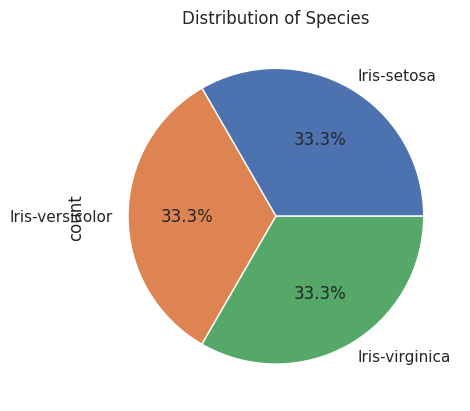

In [ ]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
plt.title("Distribution of Species")
iris['Species'].value_counts().plot.pie(autopct="%1.1f%%");

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<ipython-input-4-1710683761>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = iris, palette=svm_palette)
<ipython-input-4-1710683761>:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = iris, palette=svm_palette)
<ipython-input-4-1710683761>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = iris, palette=svm_palette)
<ipython-input-4-1710683761>:7: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.violinplot(x = 'Species', y = 'SepalWidthCm', data =

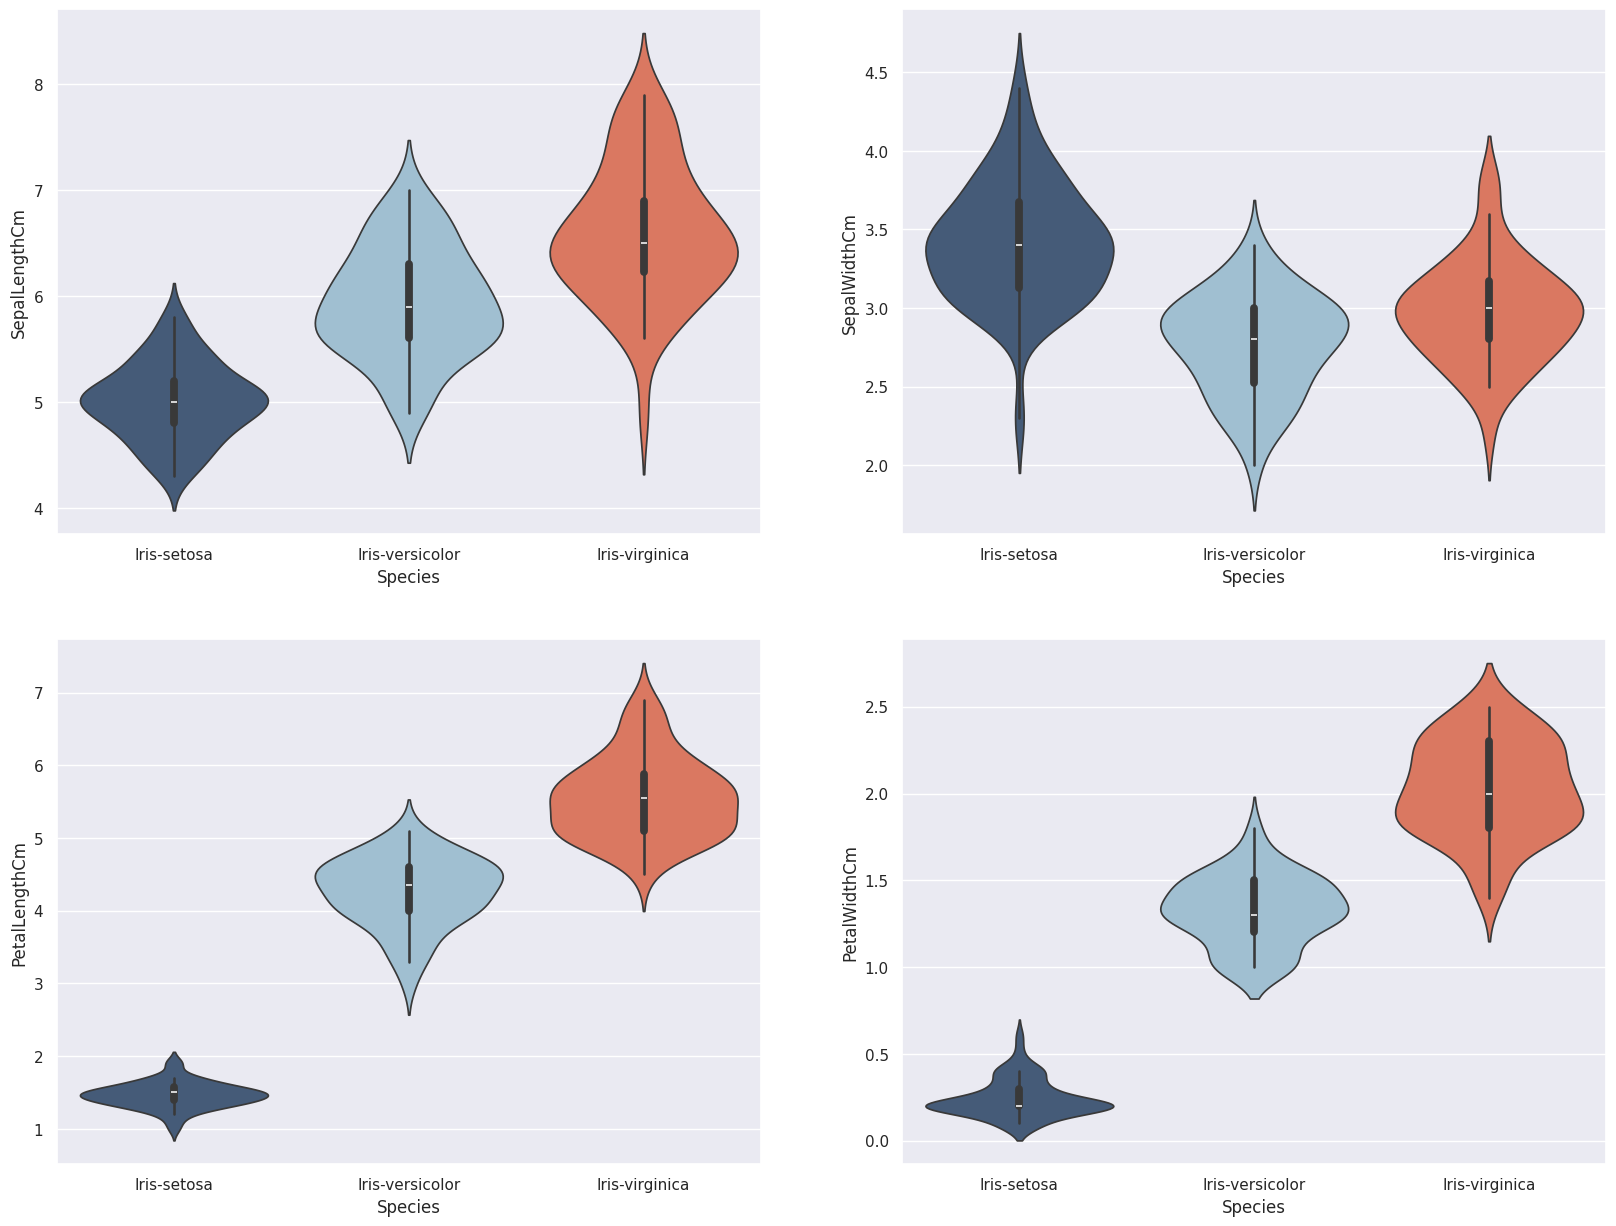

In [ ]:
# Analizando las medidas de las flores en diagramas de violín
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = iris, palette=svm_palette)
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = iris, palette=svm_palette)
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = iris, palette=svm_palette)
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = iris, palette=svm_palette);

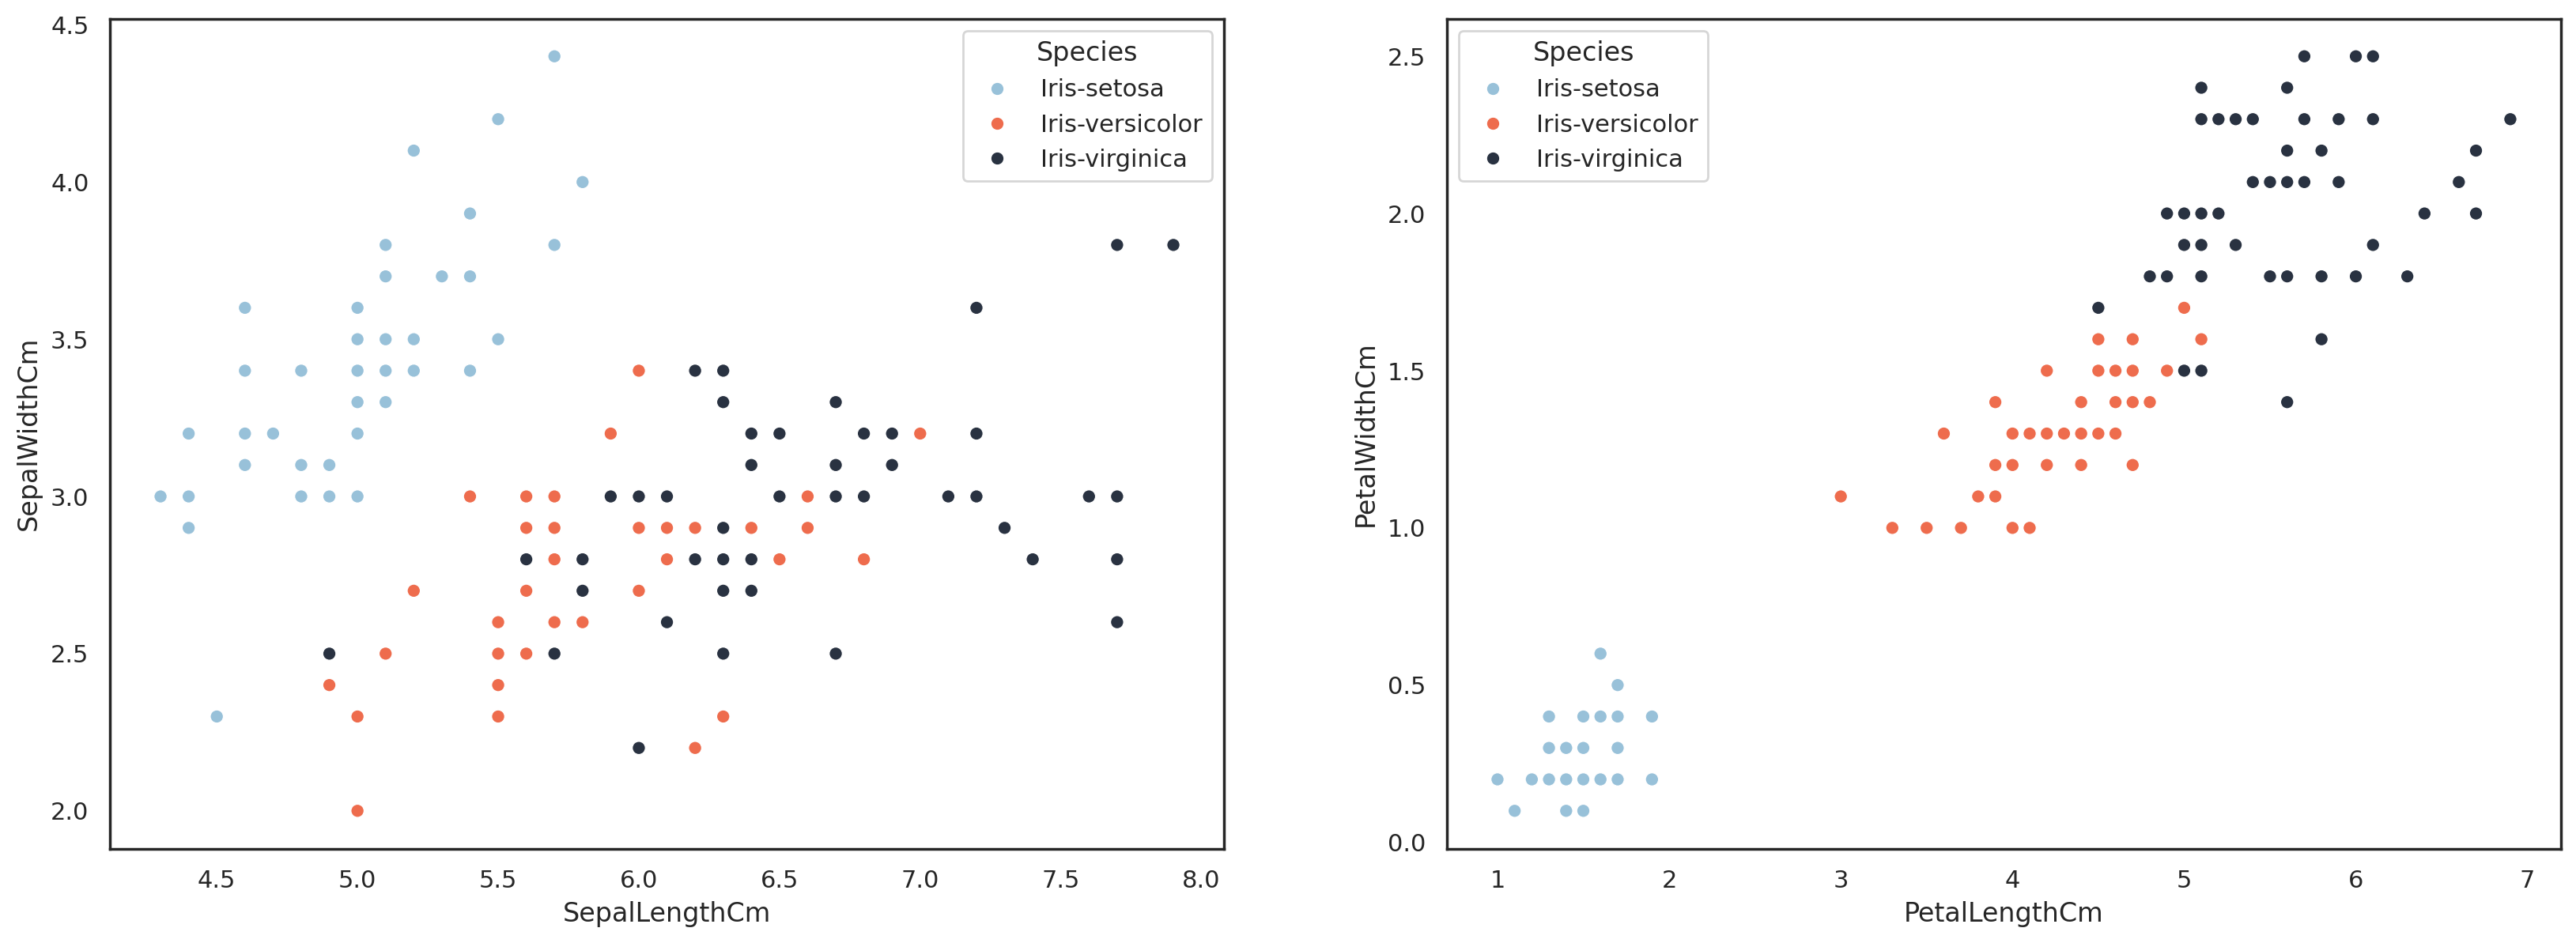

In [ ]:
# Visualizando las características en un análisis multivariado, en este caso graficaremos sepalo (ancho y alto)  y pétalo (ancho y alto)
plt.figure(figsize=(20,15), dpi = 200)
sns.set_style('white')
plt.subplot(2,2,1)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = iris, palette=svm_palette[1:])
plt.subplot(2,2,2)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = iris, palette=svm_palette[1:]);
# como se vio en los gráficos de violín, la especie iris setosa es linealmente separable, es decir, trazando una recta sobre el plano es posible clasificar si una flor pertenece a esta especie.

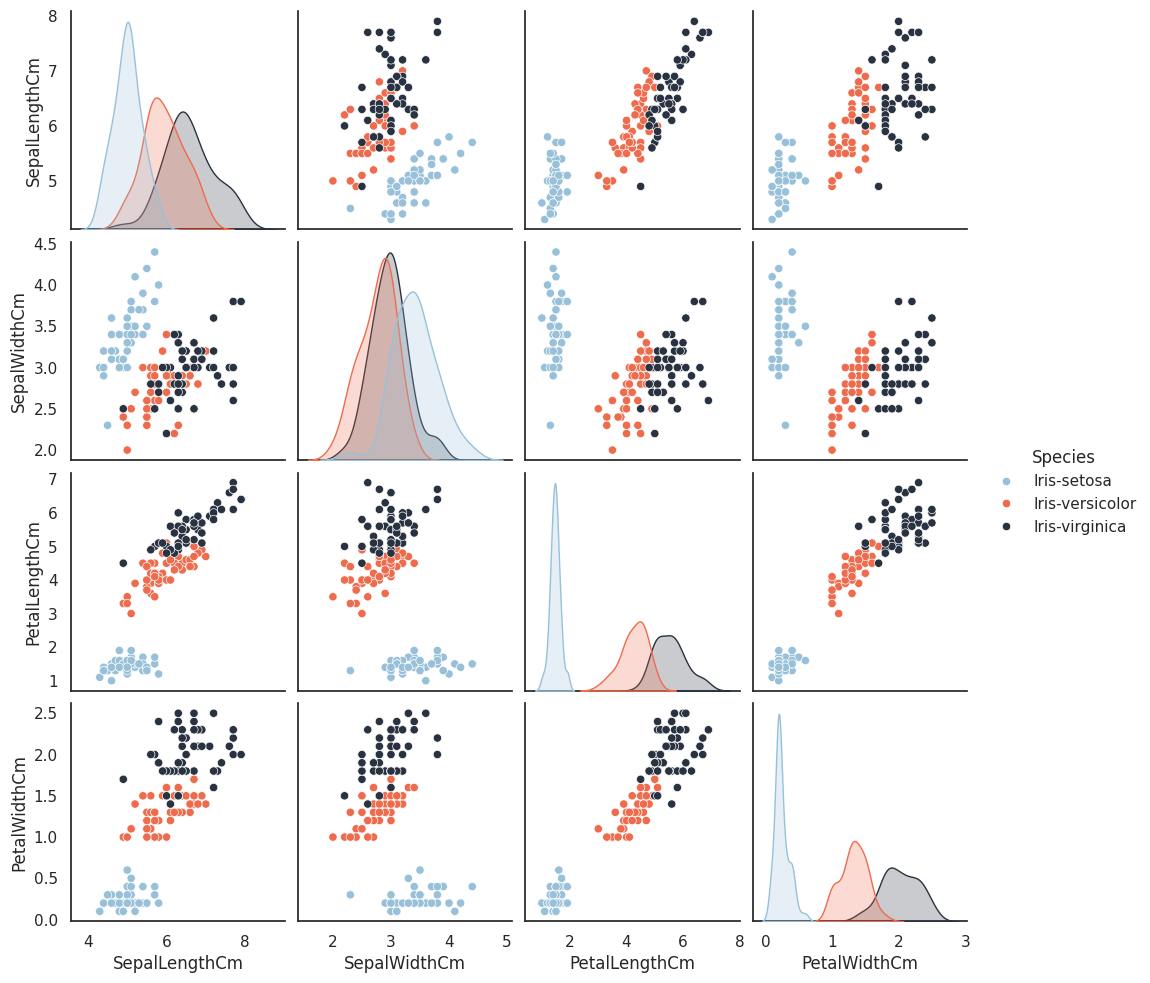

In [ ]:
sns.pairplot(iris, hue = 'Species', vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], palette=svm_palette[1:] );

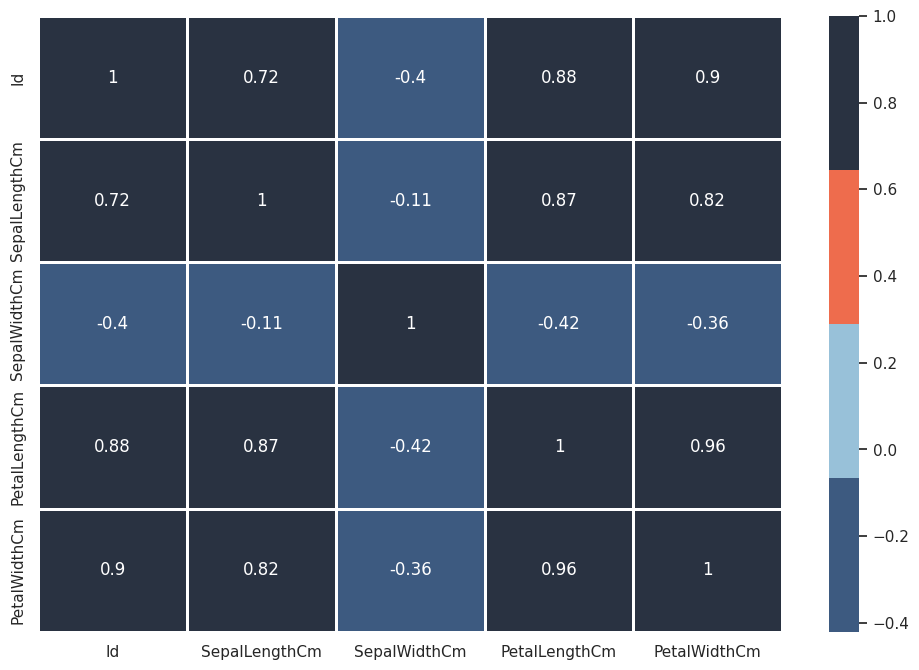

In [ ]:
# revisando la correlación entre las variables
iris_features = iris.drop("Species", axis=1) # eliminando la columna con nombres
plt.figure(figsize=(12,8))
sns.heatmap(iris_features.corr(), annot=True, cmap=svm_palette, linewidths = 2) # calcular correlación y graficar como mapa de calor
plt.show()

## 2.3 Regresión logística

In [ ]:
# Para el caso de la regresión logística tenemos que procesar las etiquetas de entrada como números, este modelo no puede obtener como entrada 'Iris-setosa' por lo que se necesita reemplazar por un número
iris["target"] = iris["Species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2,})
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
# separando el dataset
X = iris.iloc[:, [0, 1, 2, 3]].values
y = iris.iloc[:, 5].values
# preprocesando los datos para que tengan media cero y desviación de uno

# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()
X = sc.fit_transform(X)
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Ajustando el modelo
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', multi_class="auto")
classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto')

In [ ]:
# This part already formats the output in rows
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res) # Add print to display the result

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
Iris-versicolor | Iris-versicolor | 0.0        | 0.82          | 0.18      
Iris-virginica | Iris-virginica | 0.0        | 0.03          | 0.97      
Iris-versicolor | Iris-versicolor | 0.01       | 0.97          | 0.02      
Iris-versicolor | Iris-versicolor | 0.01       | 0.81          | 0.17      
Iris-setosa | Iris-setosa | 0.97       | 0.03          | 0.0       
Iris-setosa | Iris-setosa | 0.98       | 0.02          | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.26          | 0.74      
Iris-setosa | Iris-setosa | 0.97       | 0.03          | 0.0       
Iris-versicolor | Iris-versicolor | 0.02       | 0.79          | 0.2       
Iris-virginica | Iris-virginica | 0.0        | 0.03          | 0.97      
Iris-virginica | Iris-virginica | 0.0        | 0.05          | 0.95      
Iris-virginica | Iris-virginica | 0.0        | 0.01          |

In [ ]:
# Evaluando matriz de confusión
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 12  0]
 [ 0  0 13]]


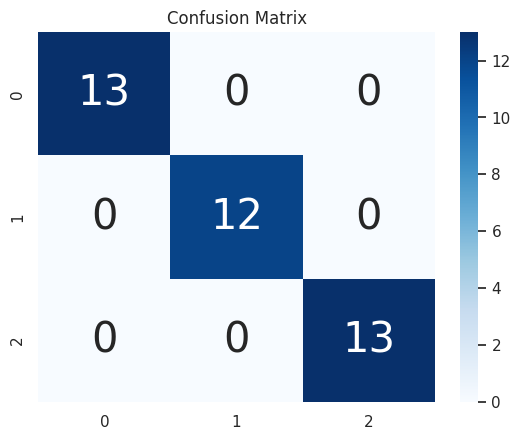

In [ ]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()